<p style="font-family: Arial; font-size:2.55em;color:purple; font-style:bold"><br>
Multi-step Time Series Forecasting with Machine Learning <br></p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Emissions Time Series Prediction</p>

The Machine LSTM Algorithm implements the mechanisim to forecast the future predictions based on the historical data available. 

In [228]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


In [229]:
data = pd.read_csv('Model.csv')
cl = data.iloc[:,6].values

In [230]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

In [231]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]

In [232]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=800,validation_data=(X_test,y_test),shuffle=False)

Train on 34 samples, validate on 9 samples
Epoch 1/800
34/34 [==============================] - 2s 58ms/step - loss: 0.3271 - val_loss: 0.0327
Epoch 2/800
34/34 [==============================] - 0s 2ms/step - loss: 0.1644 - val_loss: 0.0284
Epoch 3/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0566 - val_loss: 0.0992
Epoch 4/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0404 - val_loss: 0.1605
Epoch 5/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0709 - val_loss: 0.1152
Epoch 6/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0449 - val_loss: 0.0635
Epoch 7/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.0379
Epoch 8/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0340 - val_loss: 0.0293
Epoch 9/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.0284
Epoch 10/800
34/34 [==============================] - 0s 3ms/step

34/34 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.0482
Epoch 83/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.0481
Epoch 84/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.0479
Epoch 85/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0477
Epoch 86/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0475
Epoch 87/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0473
Epoch 88/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0471
Epoch 89/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.0469
Epoch 90/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.0468
Epoch 91/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.0466
Epoch 92/800


34/34 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.0373
Epoch 164/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.0372
Epoch 165/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0371
Epoch 166/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0370
Epoch 167/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0370
Epoch 168/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0369
Epoch 169/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0368
Epoch 170/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.0367
Epoch 171/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.0366
Epoch 172/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0123 - val_loss: 0.0365
Epoc

34/34 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0310
Epoch 245/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0309
Epoch 246/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0308
Epoch 247/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0307
Epoch 248/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0306
Epoch 249/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0305
Epoch 250/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0304
Epoch 251/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0302
Epoch 252/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0301
Epoch 253/800
34/34 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0300
Epoc

34/34 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0270
Epoch 326/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0249
Epoch 327/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0262
Epoch 328/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0261
Epoch 329/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0252
Epoch 330/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0268
Epoch 331/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0254
Epoch 332/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0262
Epoch 333/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0265
Epoch 334/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0257
Epoc

34/34 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0260
Epoch 407/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0244
Epoch 408/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0235
Epoch 409/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0256
Epoch 410/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0248
Epoch 411/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0239
Epoch 412/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0251
Epoch 413/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0243
Epoch 414/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0238
Epoch 415/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0251
Epoc

34/34 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0230
Epoch 488/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0225
Epoch 489/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0236
Epoch 490/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0238
Epoch 491/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0223
Epoch 492/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0227
Epoch 493/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0241
Epoch 494/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0233
Epoch 495/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0219
Epoch 496/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0235
Epoc

34/34 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0218
Epoch 569/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0227
Epoch 570/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0217
Epoch 571/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0218
Epoch 572/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0227
Epoch 573/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0217
Epoch 574/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0216
Epoch 575/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0224
Epoch 576/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0220
Epoch 577/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0218
Epoc

34/34 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0220
Epoch 650/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0226
Epoch 651/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0213
Epoch 652/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0220
Epoch 653/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0218
Epoch 654/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0214
Epoch 655/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0222
Epoch 656/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0216
Epoch 657/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0214
Epoch 658/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0222
Epoc

34/34 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0263
Epoch 731/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0263
Epoch 732/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0264
Epoch 733/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0265
Epoch 734/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0262
Epoch 735/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0258
Epoch 736/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0255
Epoch 737/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0254
Epoch 738/800
34/34 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0254
Epoch 739/800
34/34 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0253
Epoc

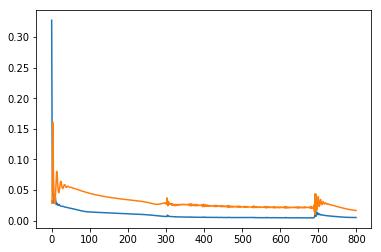

In [233]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [234]:
Xt = model.predict(X_test)

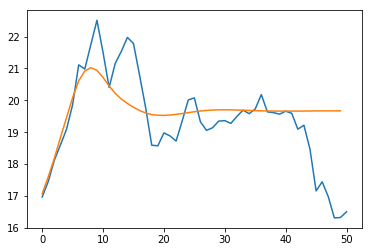

In [235]:
import matplotlib.pyplot as plt
pred_list = []

X_test_loop = X_test[-1]

for j in range (50):
    Xt = model.predict(X_test_loop.reshape(1,7,1))
    pred_list.append(scl.inverse_transform(Xt)[0])
    X_test_loop = X_test_loop.tolist()
    X_test_loop.append(Xt[0])
    X_test_loop=np.array(X_test_loop[-7:])
plt.plot(data.iloc[:,6].values)
plt.plot(pred_list)

In [236]:
df1 = pd.DataFrame(pred_list)

In [237]:
df1.to_csv("LSTM_CarbonEmissions_FuturePredictions_50Years.csv")